# HAPPINESS
___

STAT 201 - Group 12: Anne Nguyen, Eric Pien, Oliver Gullery, Ruby Yang




## Introduction
___

Happiness can be said to be a subjective assessment of an individual’s emotional state or of their life satisfaction. Considering the latter, many factors can influence a person’s life satisfaction such as health, income, and social networks and these factors can be affected by numerous life events. One such large scale event is the COVID-19 pandemic, the worldwide spread of a contagious viral disease starting at the end of 2019. We aim to see whether COVID-19 had an impact on levels of happiness using data from the World Happiness Report. The happiness score, labelled as life ladder, for each country is assessed using the Cantril ladder in which individuals from their respective countries imagine their current life position on a ladder where the worst possible life for themselves is numbered zero and best possible life is ten. We will compare the mean and standard deviation in happiness score for years before and following the COVID-19 pandemic.

## Preliminary Result ##
___

### Data Loading, Cleaning, Splitting ###

In [107]:
# Environment Setup
library(tidyverse)
library(tidymodels)
library(GGally)
library(gridExtra)
library(janitor)
library(cowplot)
library(geomtextpath)


options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 rows

In [40]:
# Read data from the web into R
data <- read_csv('https://raw.githubusercontent.com/ericpien/stat-201-project/main/data/DataForTable2.1.csv',skip=0)

# Clean/Wrangle Data
happiness_data <- data |>
    clean_names() |>
    as_tibble() |>
    drop_na()

# Create n_tile clusters by the year
n_tile <- 4

happiness_data <- happiness_data |>
    group_by(year) |>
    mutate(life_ladder_ntile = ntile(-life_ladder,n_tile),
            log_gdp_per_capita_ntile = ntile(-log_gdp_per_capita,n_tile),
            social_support_ntile = ntile(-social_support,n_tile),
            healthy_life_expectancy_at_birth_ntile = ntile(-healthy_life_expectancy_at_birth,n_tile),
            freedom_to_make_life_choices_ntile = ntile(-freedom_to_make_life_choices,n_tile),
            generosity_ntile = ntile(-generosity,n_tile),
            perceptions_of_corruption_ntile = ntile(-perceptions_of_corruption,n_tile),
            positive_affect_ntile = ntile(-positive_affect,n_tile),
            negative_affect_ntile = ntile(-negative_affect,n_tile),
            confidence_in_national_government_ntile = ntile(-confidence_in_national_government,n_tile))

# Create wide dataframe of mean happiness
happiness_data_wide_life_ladder <- happiness_data |> 
    group_by(country_name,year) |>
    summarize(life_ladder = life_ladder) |>
    pivot_wider(names_from = year,
                values_from = life_ladder)

happiness_data_wide_life_ladder

Rows: 2089 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Country name
dbl (11): year, Life Ladder, Log GDP per capita, Social support, Healthy lif...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'country_name'. You can override using the
`.groups` argument.


country_name,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2007,2020,2021,2006,2005
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,3.72359,4.401778,4.758381,3.831719,3.782938,3.572100,3.130896,3.982855,4.220169,2.661718,2.694303,2.375092,NA,NA,NA,NA,NA
Albania,NA,NA,NA,NA,5.510124,4.550648,4.813763,4.606651,4.511101,4.639548,5.004403,4.995318,4.634252,5.36491,5.255482,NA,NA
Angola,NA,NA,NA,5.589001,4.360250,3.937107,3.794838,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Yemen,NA,4.809259,4.350313,3.746256,4.060601,4.217679,3.967958,2.982674,NA,NA,3.057514,NA,NA,NA,NA,NA,NA
Zambia,4.730263,5.260361,NA,4.999114,5.013375,5.243996,4.345837,4.843164,4.347544,3.932777,4.041488,3.306797,3.998293,4.837992,3.082155,4.824455,NA
Zimbabwe,3.174264,4.055914,4.681570,4.845642,4.955101,4.690188,4.184451,3.703191,3.735400,3.638300,3.616480,2.693523,3.280247,3.159802,3.154578,3.826268,NA


### Preliminary Data Exploration ###

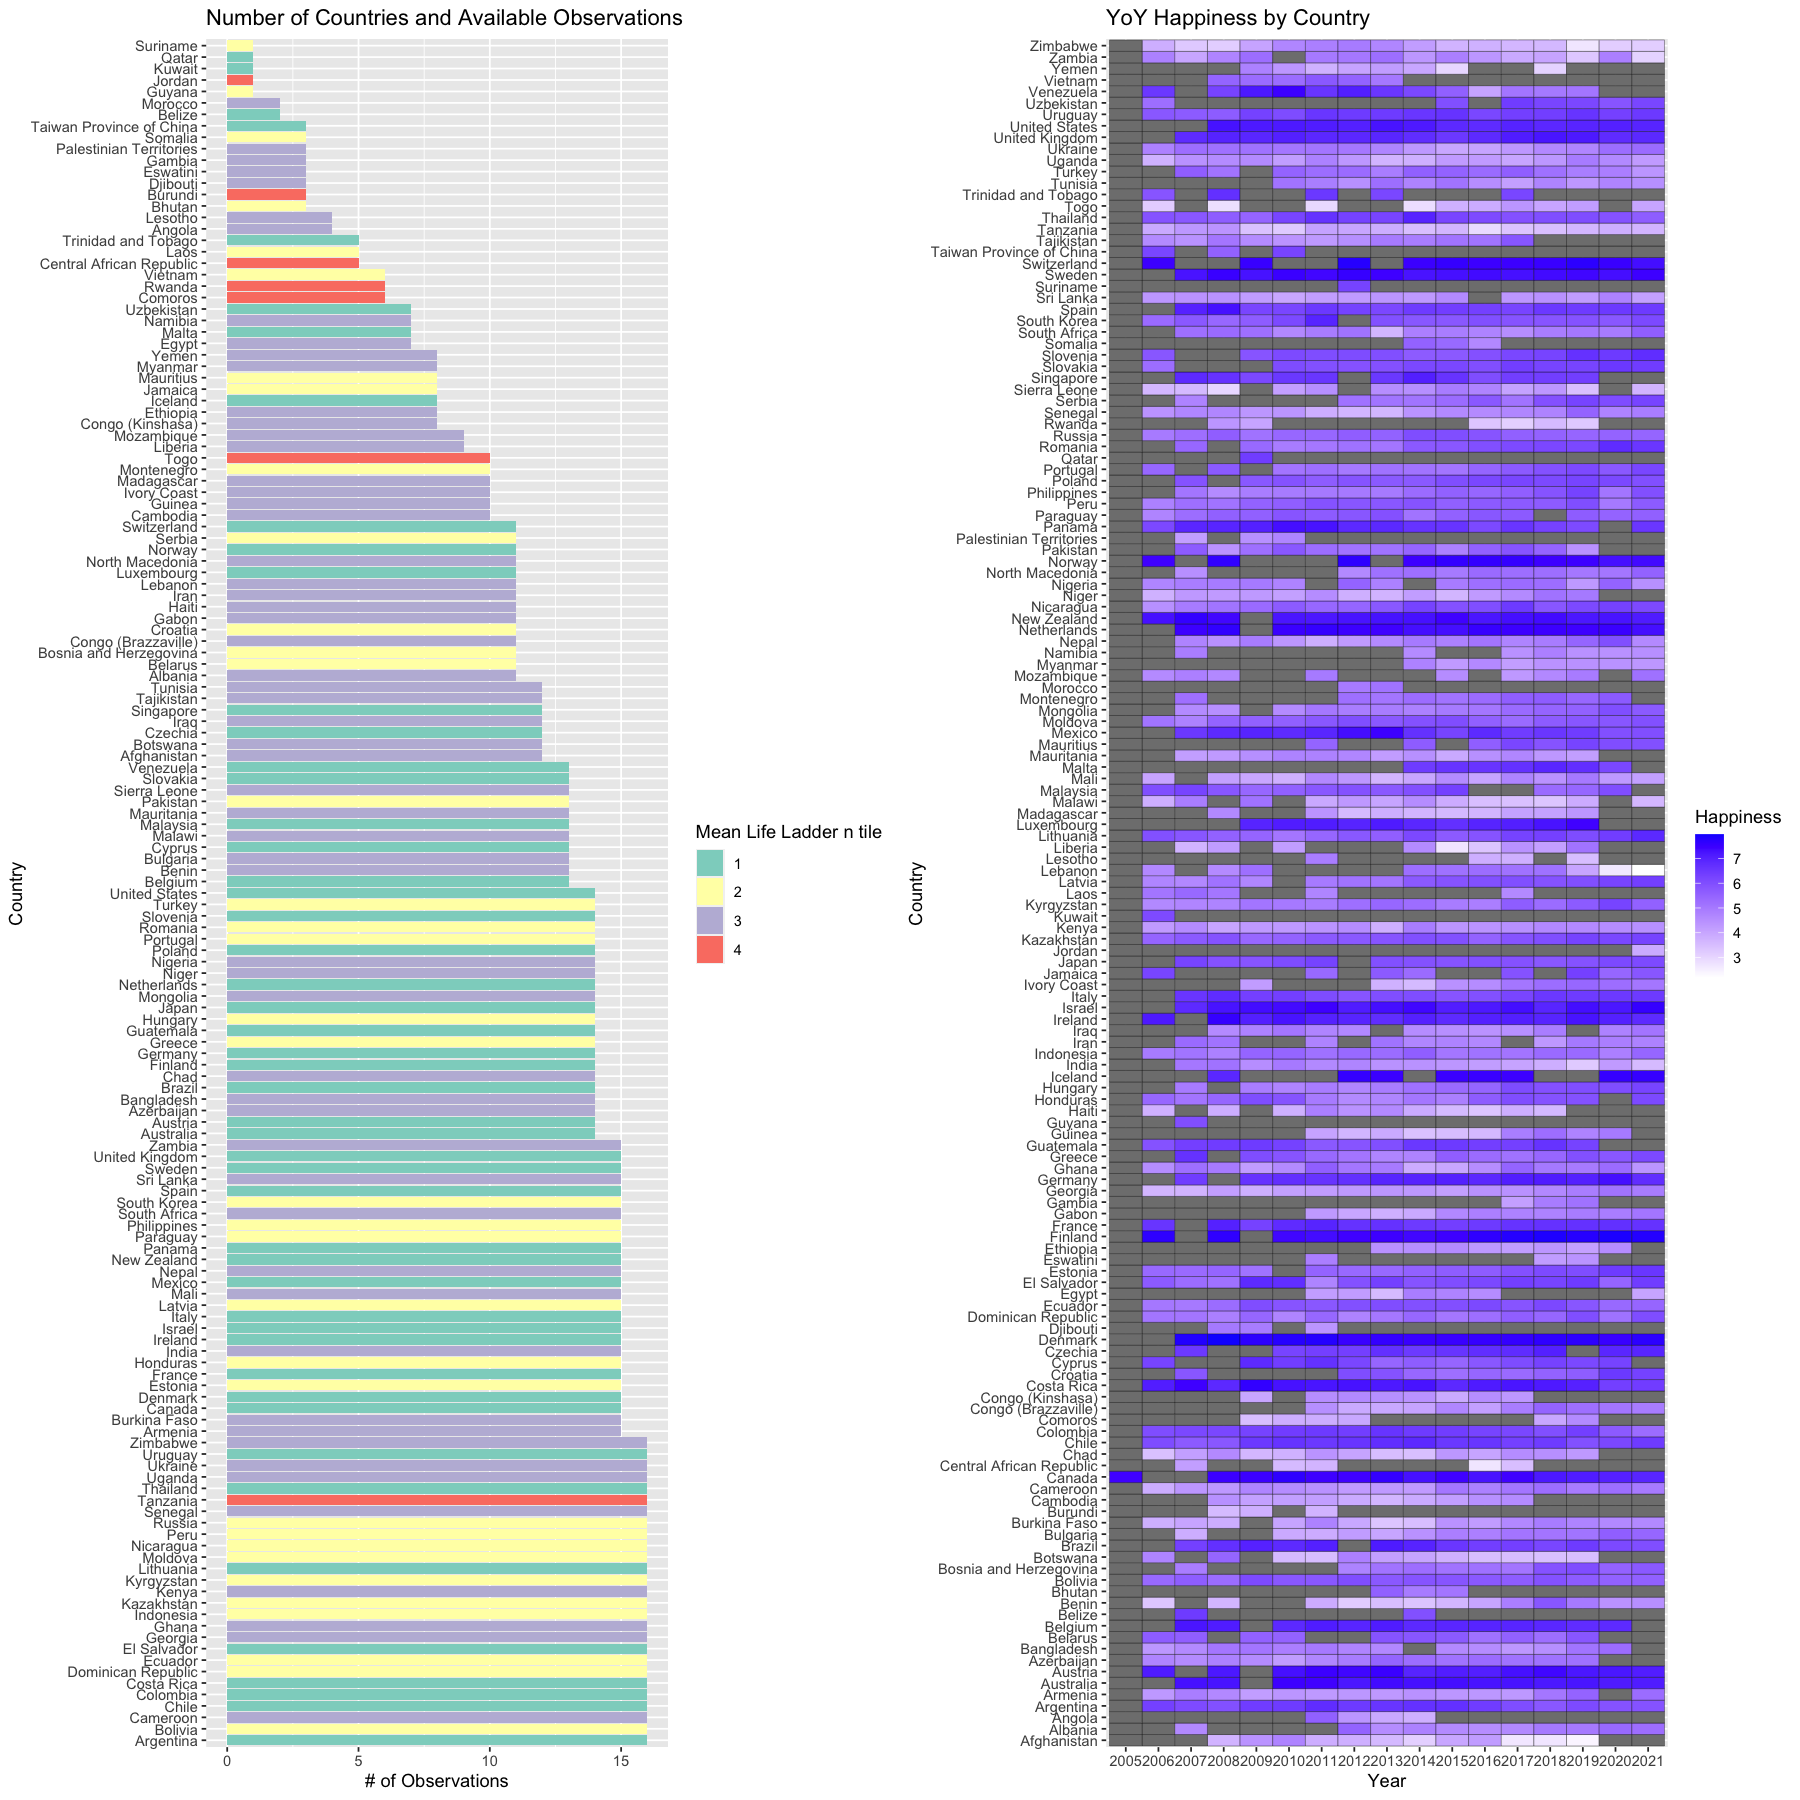

In [160]:
# Number of countries and available data
options(repr.plot.width = 15, repr.plot.height = 15) 

happiness_data_obs <- happiness_data |> 
    group_by(country_name) |> 
    summarize(obs_count=n(),
                mean_cluster = as.integer(mean(life_ladder_ntile))) |>
    arrange(-obs_count) |>
    ggplot(aes(x=obs_count,y=fct_inorder(country_name),fill = factor(mean_cluster))) +
    geom_col() +
    scale_fill_brewer(palette="Set3") +
    labs(x="# of Observations", y="Country", fill="Mean Life Ladder n tile", title="Number of Countries and Available Observations")

# YoY happiness metric heatmap
happiness_heatmap <- happiness_data_wide_life_ladder |>
    pivot_longer(cols=-country_name,names_to="year",values_to ="life_ladder") |>
    ggplot(aes(x=year, y=country_name)) +
    geom_tile(aes(fill=life_ladder), color="black") +
    scale_fill_gradient(low="white", high="#1818ff") +
    labs(x="Year", y="Country", fill="Happiness", title="YoY Happiness by Country")

plot_grid(happiness_data_obs,happiness_heatmap, ncol = 2)

### 2019, 2020, 2021 Data ###

In [ ]:
# Create a list of countries that have data for 2019 and 2021
country_name_2019_2021  <- happiness_data |>
    group_by(country_name) |>
    filter(year %in% c(2019,2021)) |>
    drop_na() |>
    summarise(n=n()) |>
    filter(n>1) |>
    pull(country_name)

# Select the countries and filter for 2019 and 2021 data
happiness_data_2019_2021 <- happiness_data |>
    filter(country_name %in% country_name_2019_2021,
            year %in% c(2019,2021))

happiness_data_2019_2021

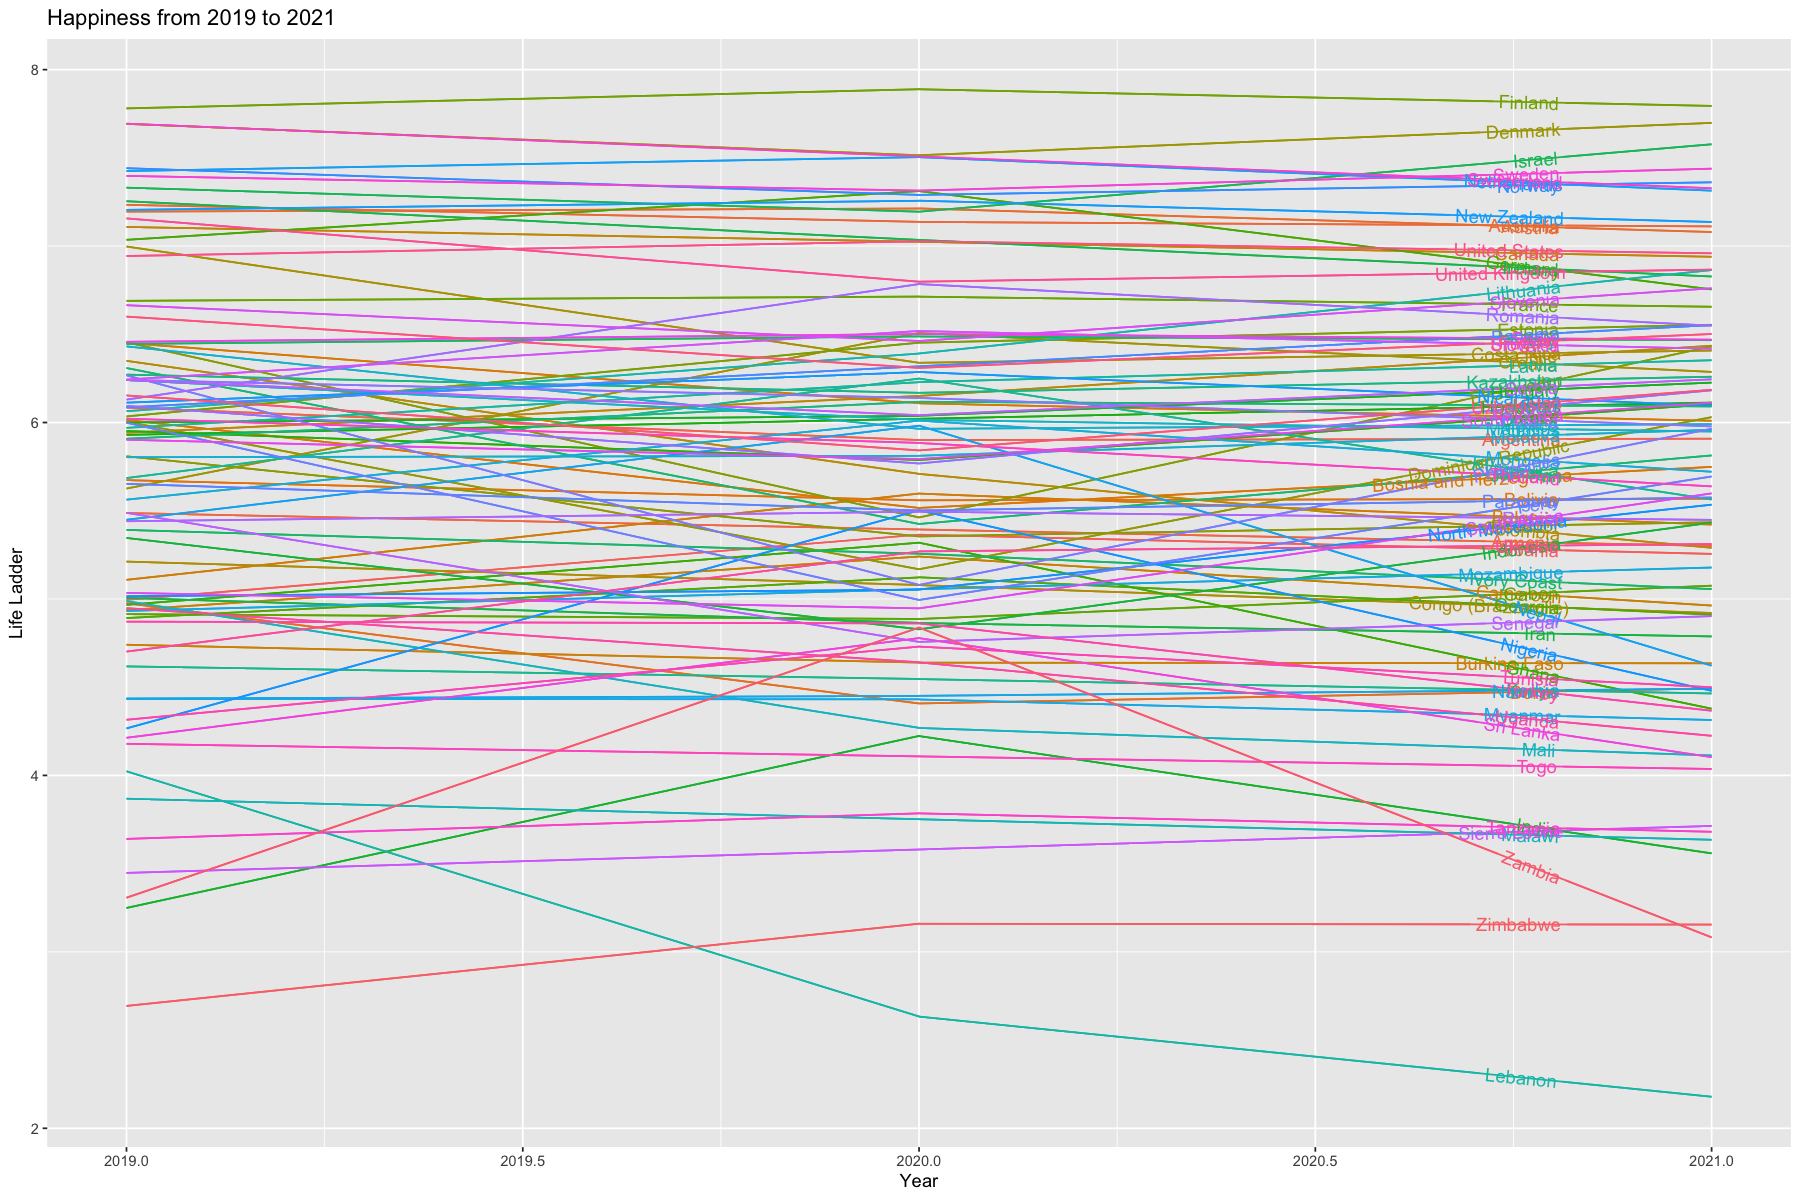

In [157]:
# Change from 2019, 2020, and 2021 happiness
options(repr.plot.width = 15, repr.plot.height = 10)

happiness_trail <- happiness_data |>
    filter(year %in% c(2019, 2020, 2021),
            country_name %in% country_name_2019_2021) |>
    ggplot(aes(x=year, y=life_ladder, group=country_name, color=country_name)) +
    geom_line(show.legend=FALSE) +
    geom_textline(aes(x=year, y=life_ladder, group=country_name, colour=country_name, label=country_name), hjust = 0.9) +
    theme(legend.position="none") +
    labs(x="Year",y="Life Ladder",title="Happiness from 2019 to 2021")

happiness_trail

[1] -0.06677416

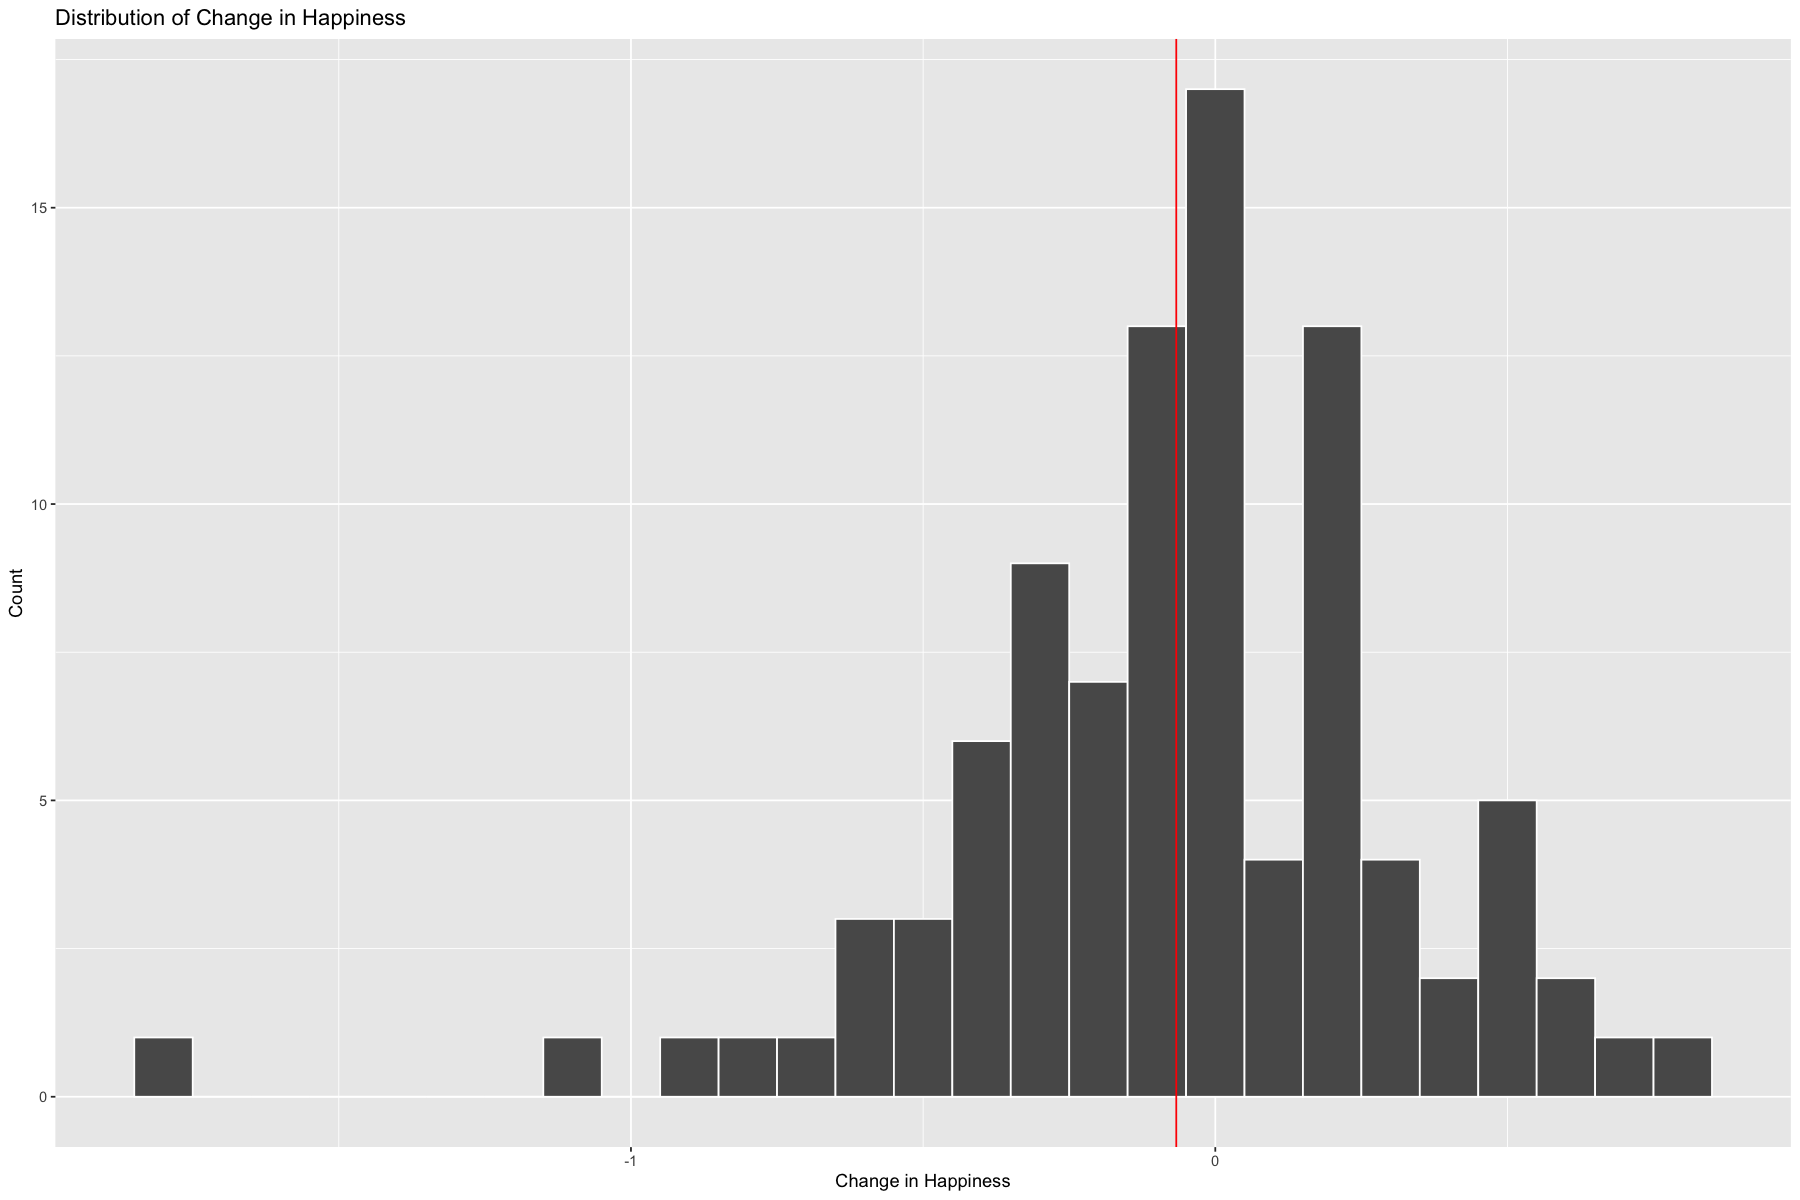

In [158]:
# Change Mean from 2021 to 2019
change_2019_2021 <- happiness_data_mean_wide |>
    select(country_name,`2019`,`2021`) |>
    drop_na() |>
    group_by(country_name) |>
    mutate(change = `2021`-`2019`)

# Mean Change
mean(change_2019_2021$change)

# Plot the Distribution
options(repr.plot.width = 15, repr.plot.height = 10) 
change_2019_2021 |>
    ggplot(aes(x=change)) +
    geom_histogram(binwidth = 0.1, color="white") +
    geom_vline(xintercept=mean(change_2019_2021$change),color="red") +
    labs(x="Change in Happiness",y="Count",title="Distribution of Change in Happiness")

## Methods
___


TODO:
* "what ways is this report trust worthy?"
* "Explain the plots / estimates"
* "include at least one hypothesis test and CI"
* "compare both the bootstrapping and asymptotic methods"
* "how might the report play out?"
    1. what do you expect to find?
    2. what impact should such findings have?
    3. what future questions could this lead to?


## References
___

TODO:
"At least two citation and source of the data"
1. ... 

2. ...

3. ...
4. Source of Data: https://worldhappiness.report/ed/2021/